In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import copy
import random
%matplotlib inline
import seaborn as sns
from pylab import *
from matplotlib.colors import colorConverter

import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
palette.extend(['salmon', 'teal','yellowgreen'])

In [2]:
df = pd.read_excel('Tcell_Mal-Asp_SIM_isocor-input_res.xlsx')
df = df.drop(['isotopic_inchi', 'derivative', 'area', 'residuum', 'mean_enrichment'], axis=1)

In [3]:
df

,sample,metabolite,isotopologue,corrected_area,isotopologue_fraction
0,gpASNase,Asn,0,3.832528e+04,0.989886
1,gpASNase,Asn,1,0.000000e+00,0.000000
2,gpASNase,Asn,2,0.000000e+00,0.000000
3,gpASNase,Asn,3,0.000000e+00,0.000000
4,gpASNase,Asn,4,3.915756e+02,0.010114
5,msASNase,Asn,0,4.271262e+04,0.902365
6,msASNase,Asn,1,0.000000e+00,0.000000
7,msASNase,Asn,2,0.000000e+00,0.000000
8,msASNase,Asn,3,0.000000e+00,0.000000
9,msASNase,Asn,4,4.621437e+03,0.097635


In [4]:
metabolites = ['Asn', 'Asp', 'Mal']
isotopologues = [0, 1, 2, 3, 4]
samples = ['msASNase', 'gpASNase']


bar_width = 0.8 / len(samples)
bar_color = {i:palette[i] for i in isotopologues}

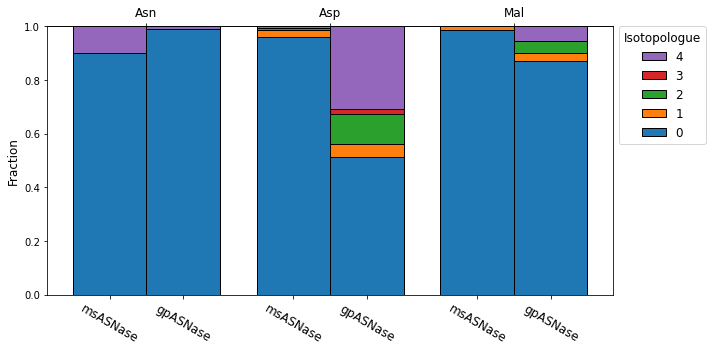

In [5]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot()

bottom_dict = dict()
metab_count = 0
for metabolite in metabolites:
    metab_count += 1
    if metabolite not in bottom_dict:
        bottom_dict[metabolite] = dict()
    for isotopologue in isotopologues:
        x_shift = len(samples)/2 * bar_width - bar_width/2
        for sample in samples:
            dfq = df.query('sample=="{}" and metabolite=="{}" and isotopologue=="{}"'.format(sample, metabolite, isotopologue))
            bar_height = dfq['isotopologue_fraction'].values[0]
            if sample not in bottom_dict[metabolite]:
                bottom_dict[metabolite][sample] = 0 
            ax_bars = ax.bar(metab_count-x_shift, bar_height, width=bar_width, bottom=bottom_dict[metabolite][sample], edgecolor='black', linewidth=1, align='center', color=bar_color[isotopologue])
            x_shift -= bar_width
            bottom_dict[metabolite][sample] += bar_height

bottom_xtick = list()
metab_count = 0
for metabolite in metabolites:
    metab_count += 1
    x_shift = len(samples)/2 * bar_width - bar_width/2
    for sample in samples:
        bottom_xtick.append((metab_count-x_shift, sample))
        x_shift -= bar_width


ax.set_ylabel('Fraction', size=12)
#ax.set_title('Isotopologue distribution', size=14)
ax.set_xticks([pos for pos, sample in bottom_xtick])
ax.set_xticklabels([sample for pos, sample in bottom_xtick], size=12, rotation=-30)


secax = ax.secondary_xaxis('top')
secax.set_xticks(np.arange(len(metabolites))+1)
secax.set_xticklabels(metabolites, size=12)


labels = sorted(list(bar_color.keys()), reverse=True)
handles = [plt.Rectangle((0,0),1,1, facecolor=bar_color[label], edgecolor='black', linewidth=1) for label in labels]
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=12, title='Isotopologue', title_fontsize=12)

plt.tight_layout()
plt.savefig('isotopologue_dist.pdf')
plt.show();